In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import warnings
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [9]:
# Verificação de dados faltantes
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [13]:
# Verificação de dados faltantes
df.describe(include='O')

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [ ]:
# O dataset não apresenta dados faltantes, pois todas as colunas possuem 973 entradas válidas.

# Agora, em termos de ruído, os valores parecem razoáveis dentro de suas faixas, mas algumas observações podem ser investigadas mais detalhadamente:

# Peso (kg): Os valores variam de 40 kg a 129,9 kg. Isso parece razoável para uma população geral.
# Altura (m): A altura varia entre 1,5 m e 2,0 m, o que é comum.
# Frequência Cardíaca (BPM): A frequência cardíaca máxima está entre 160 e 199 BPM, e a média varia de 120 a 169 BPM. 
# Esses valores também são plausíveis, mas algumas frequências cardíacas máximas (como 199 BPM) podem ser consideradas altas para certas idades e contextos.
# Duração da Sessão (horas): Variando entre 0,5 e 2 horas, está dentro de um intervalo esperado.
# Porcentagem de Gordura: Varia de 10% a 35%, dentro de uma faixa razoável.
# Índice de Massa Corporal (IMC): Varia entre 12,32 e 49,84. 
# Um IMC abaixo de 18,5 é considerado baixo, e acima de 30, obeso, mas isso depende do contexto da pessoa (atletas, por exemplo, podem ter IMC fora do comum).


In [15]:
# Função para detectar outliers usando IQR (Intervalo Interquartil)
def detect_outliers_iqr(dataframe, columns):
    outliers = {}
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

In [17]:
# Definir as colunas numéricas relevantes para outliers
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                   'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

In [19]:
# Detectar outliers
outliers = detect_outliers_iqr(df, numeric_columns)

In [21]:
# Mostrar quais colunas possuem outliers
outliers_detected = {column: len(outliers[column]) for column in outliers if not outliers[column].empty}
outliers_detected

{'Weight (kg)': 9, 'Calories_Burned': 10, 'BMI': 25}

In [23]:
# Função para gerar boxplots das colunas com outliers
def plot_outliers_boxplot(dataframe, columns):
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        plt.boxplot(dataframe[column])
        plt.title(f'Boxplot - {column}')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

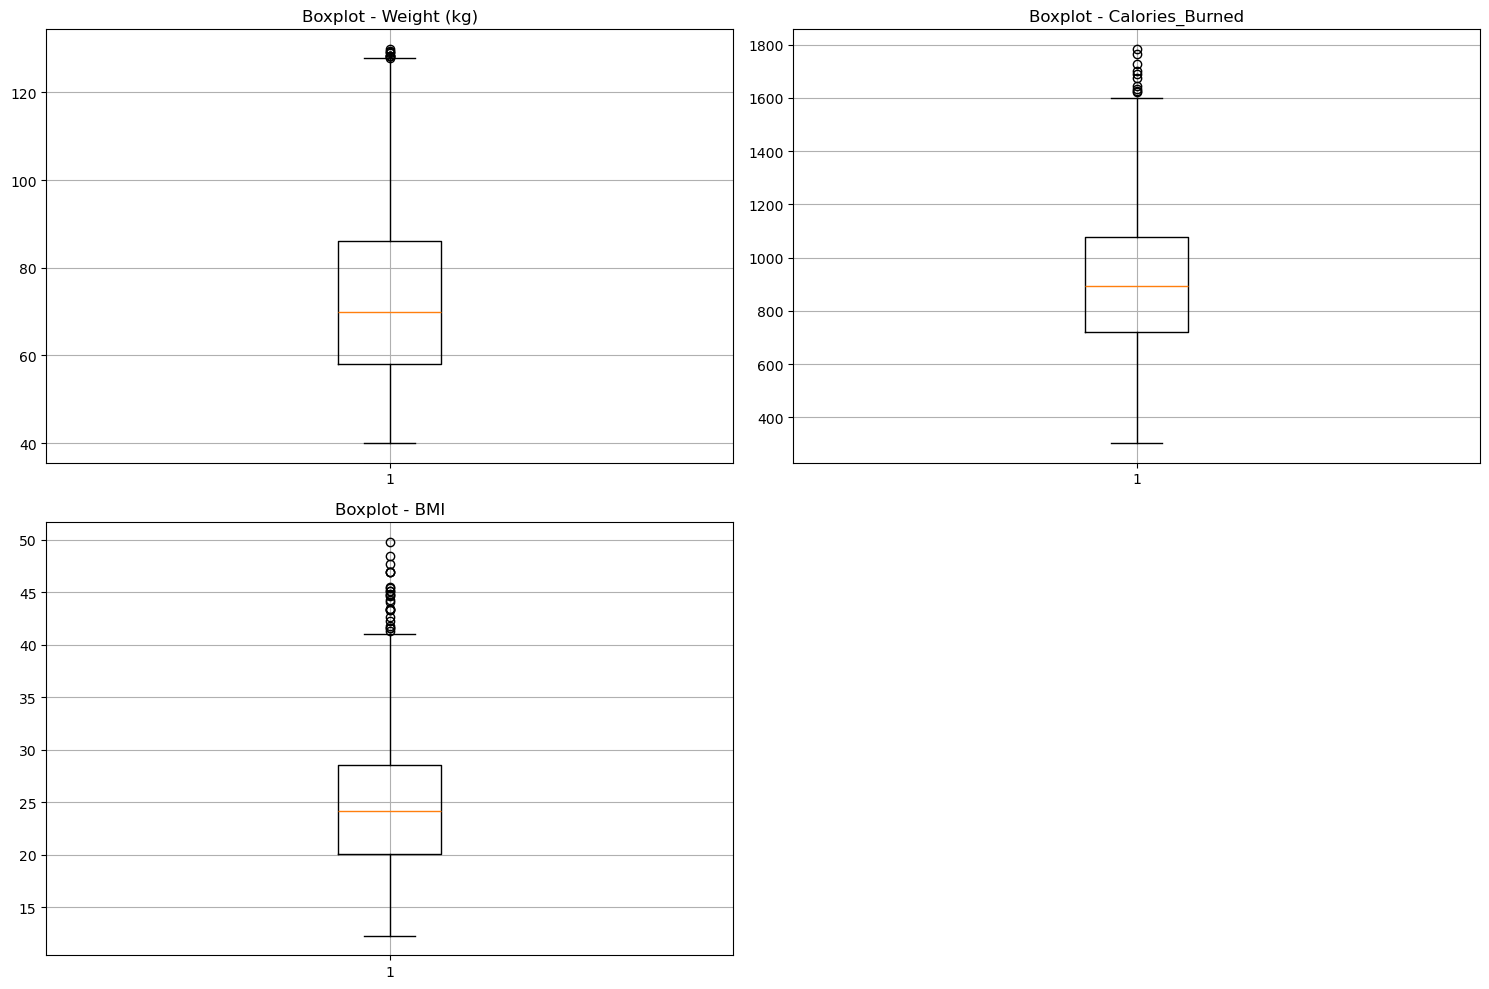

In [25]:
# Gerar boxplots para as colunas com outliers detectados
plot_outliers_boxplot(df, ['Weight (kg)', 'Calories_Burned', 'BMI'])

In [26]:
# Calcular a correlação entre as colunas numéricas
correlation_matrix = df[numeric_columns].corr()

# Exibir a matriz de correlação
correlation_matrix

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.213697


In [29]:
# Calcular a correlação entre as colunas numéricas
correlation_matrix = df[numeric_columns].corr()

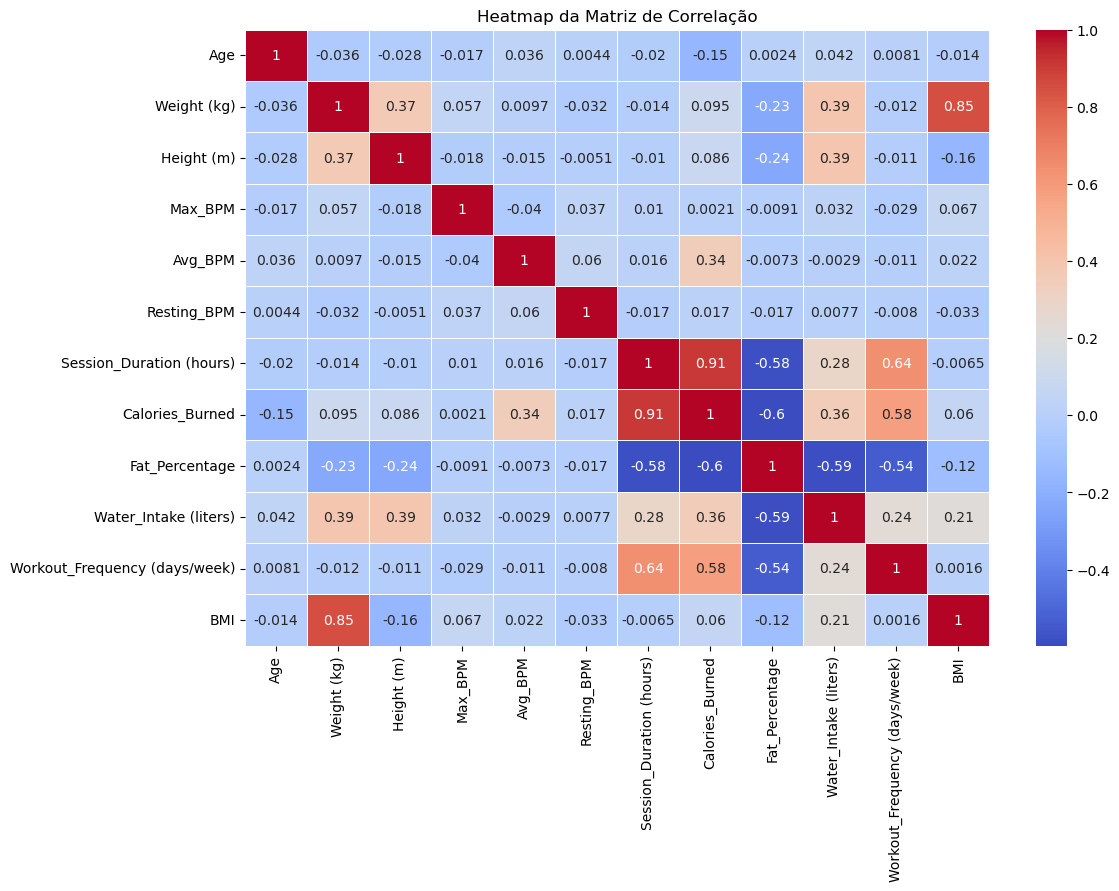

In [31]:
# Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

In [ ]:
# As variáveis com maior correlação no dataset (com valores absolutos de correlação mais próximos de 1) são:

# a) Weight (kg) e BMI: A correlação entre essas variáveis é de 0.85, o que indica uma forte correlação positiva. 
# Isso faz sentido, pois o índice de massa corporal (BMI) é calculado com base no peso e altura.

# b) Weight (kg) e Height (m): Há uma correlação positiva moderada de 0.37 entre peso e altura.

# c) Height (m) e BMI: Existe uma correlação negativa moderada de -0.16 entre altura e índice de massa corporal (BMI), 
# o que também é esperado, dado que o BMI aumenta com o peso, mas diminui com o aumento da altura para o mesmo peso.

# Essas variáveis mostram uma relação direta entre peso, altura e BMI, que são variáveis interligadas 
# pela fórmula do cálculo do BMI.

In [34]:
# Função para plotar histogramas das variáveis com outliers
def plot_histograms(dataframe, columns):
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        plt.hist(dataframe[column], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histograma - {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


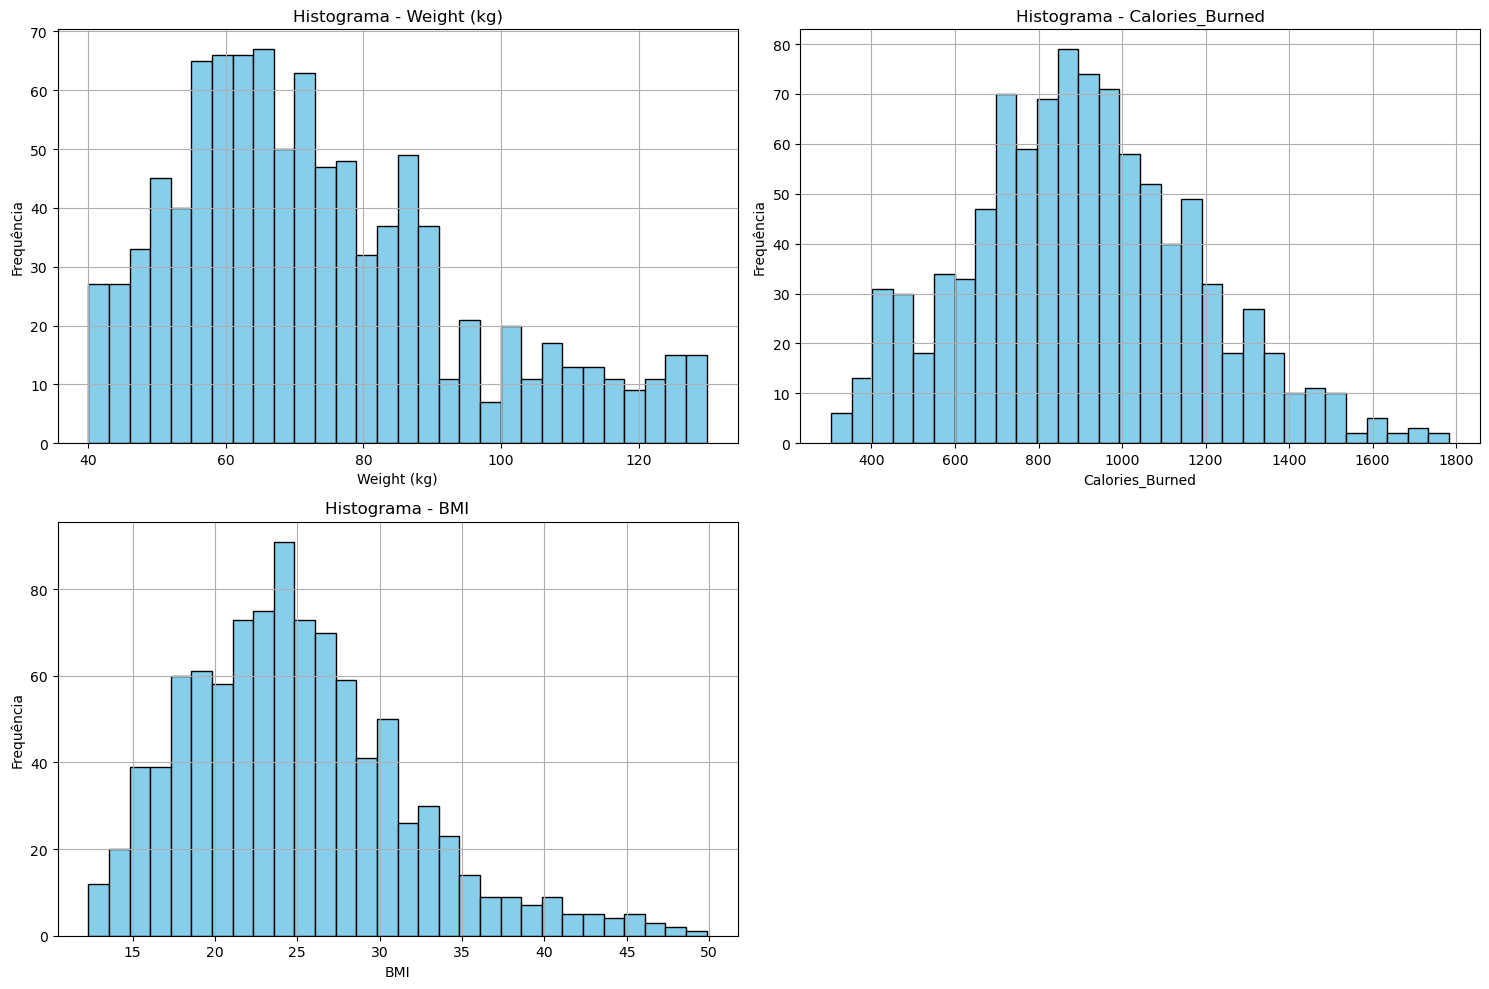

In [36]:
# Gerar histogramas para as colunas com outliers detectados
plot_histograms(df, ['Weight (kg)', 'Calories_Burned', 'BMI'])

In [38]:
# Função para gerar gráficos de violino das variáveis com outliers
def plot_violin_plots(dataframe, columns):
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.violinplot(data=dataframe, y=column, inner="point", color="lightblue")
        plt.title(f'Violin Plot - {column}')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


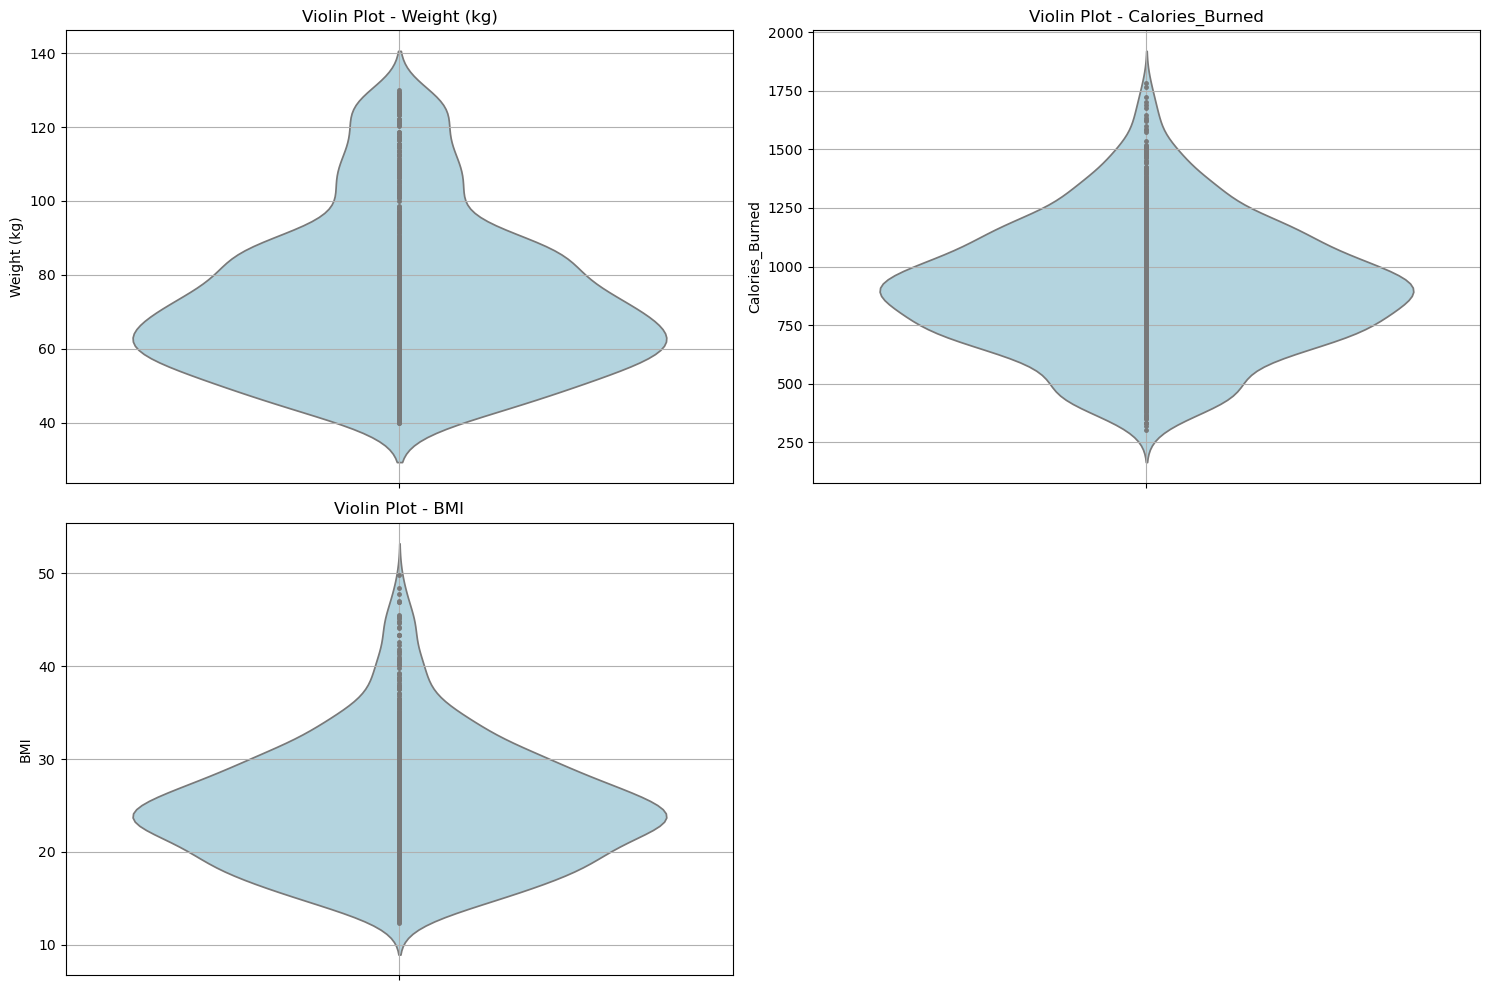

In [40]:
# Gerar gráficos de violino para as colunas com outliers detectados
plot_violin_plots(df, ['Weight (kg)', 'Calories_Burned', 'BMI'])

In [42]:
# Gerar o scatter matrix para as variáveis numéricas
def plot_scatter_matrix(dataframe, columns):
    plt.figure(figsize=(15, 15))
    scatter_matrix(dataframe[columns], alpha=0.8, figsize=(15, 15), diagonal='hist', color='lightblue')
    plt.show()


<Figure size 1500x1500 with 0 Axes>

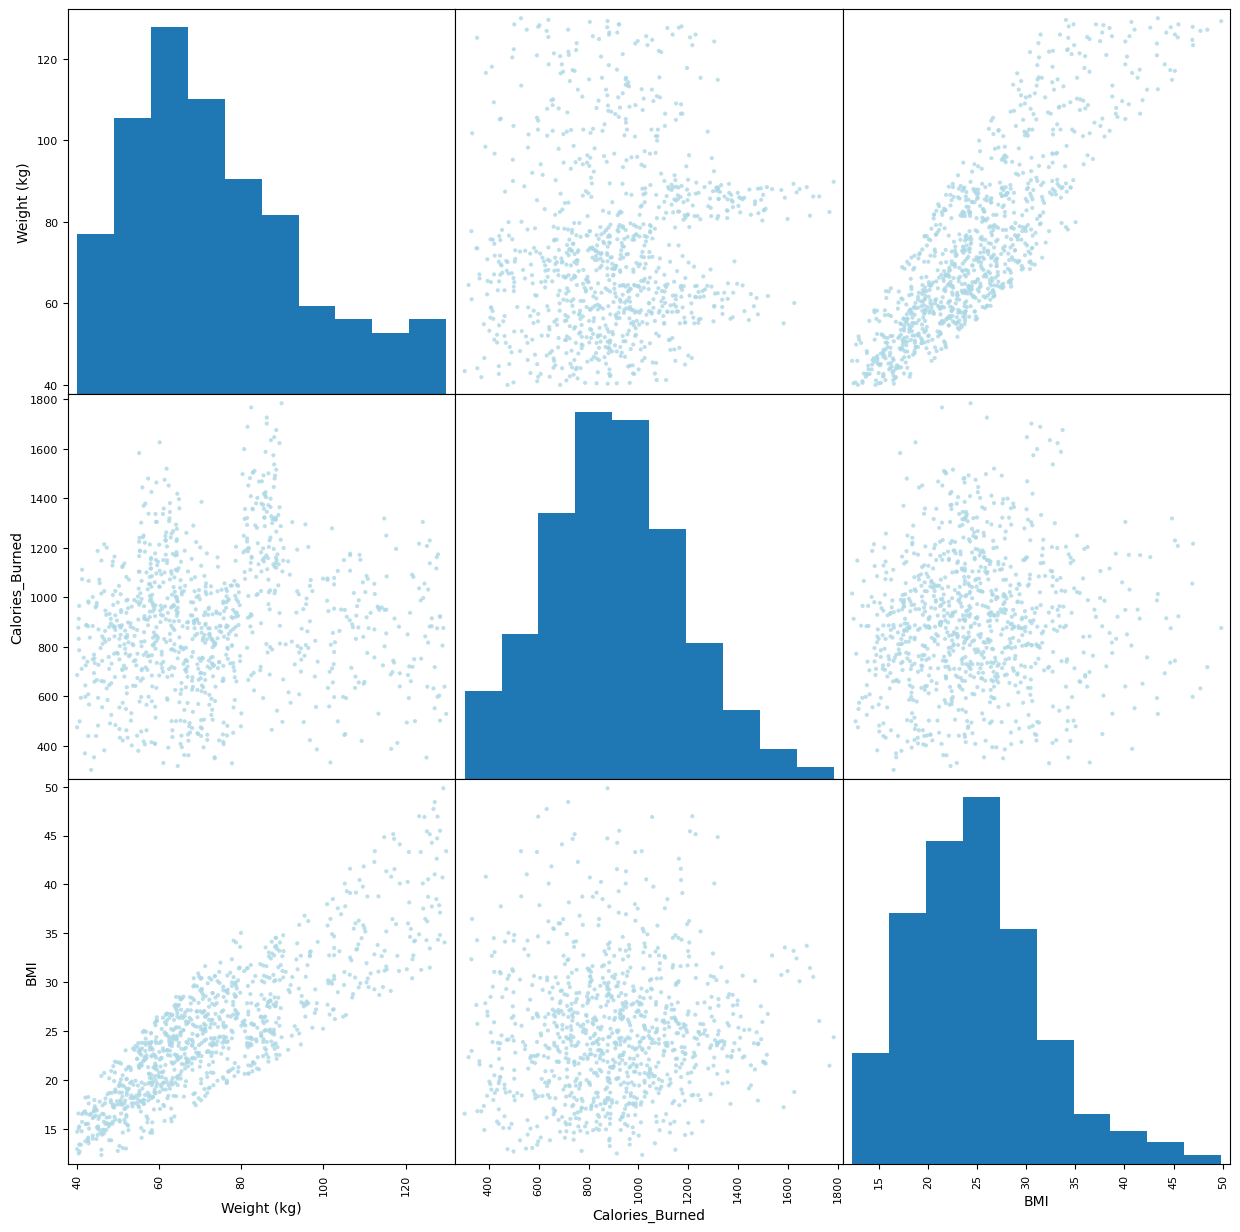

In [44]:
# Gerar o scatter matrix para as colunas com outliers detectados
plot_scatter_matrix(df, ['Weight (kg)', 'Calories_Burned', 'BMI'])

In [48]:
# Definir o tamanho do sample
sample_size = int(len(df) * 0.3)  # 30% do dataset original

In [54]:
# Gerar o sample estratificado por 'Gender' e 'Workout_Type' para manter as proporções
sampled_data = resample(df, n_samples=sample_size, stratify=df[['Gender', 'Workout_Type']], random_state=42)


In [56]:
# Exibir o sample gerado
sampled_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
782,39,Female,56.0,1.60,184,151,69,0.89,672.0,Yoga,32.6,2.0,2,1,21.87
209,26,Male,87.1,1.87,173,132,58,1.71,1241.0,Yoga,11.2,3.5,4,3,24.91
648,19,Male,127.9,1.93,185,168,70,1.27,1173.0,Strength,21.8,3.0,4,2,34.34
321,50,Female,55.4,1.55,175,122,65,1.85,1016.0,Strength,18.5,2.7,4,3,23.06
738,37,Male,87.8,1.69,183,158,69,1.81,1573.0,HIIT,10.3,3.5,5,3,30.74


<Figure size 1500x1500 with 0 Axes>

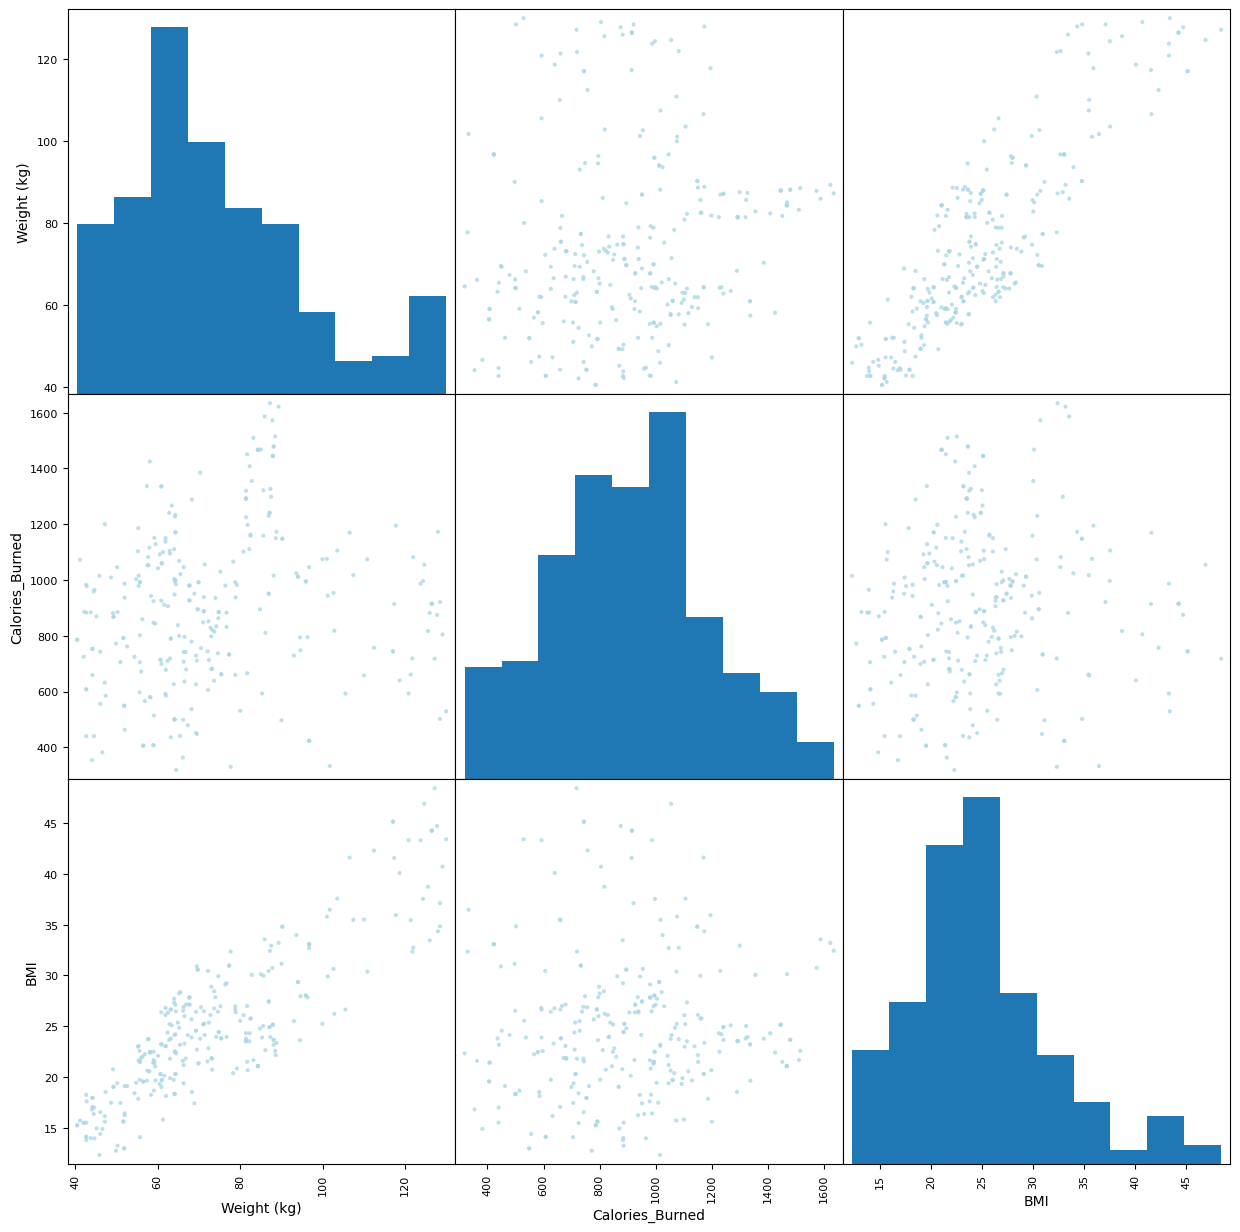

In [58]:
# Gerar o scatter matrix para as colunas com outliers detectados
plot_scatter_matrix(sampled_data, ['Weight (kg)', 'Calories_Burned', 'BMI'])

In [64]:
# Selecionar a coluna categórica 'Workout_Type'
categorical_column = df[['Workout_Type']]

In [70]:
# Instanciar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [72]:
# Ajustar o encoder e transformar a coluna categórica
encoded_data = encoder.fit_transform(categorical_column)

In [74]:
# Converter a saída para um DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Workout_Type']))


In [82]:
# Concatenar o dataset original com o DataFrame codificado
data_encoded = pd.concat([df, encoded_df], axis=1)

In [84]:
# Exibir as primeiras linhas do novo DataFrame
data_encoded.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.0,0.0,0.0,1.0
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1.0,0.0,0.0,0.0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.0,0.0,1.0,0.0
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0.0,0.0,1.0,0.0


In [86]:
# Selecionar as colunas numéricas para normalização
numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                     'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                     'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 
                     'Experience_Level', 'BMI']

In [92]:
# Instanciar o MinMaxScaler
scaler = MinMaxScaler()

In [96]:
# Ajustar o scaler e transformar as colunas numéricas
data_normalized = df.copy()
data_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [102]:
# Exibir as primeiras linhas do DataFrame normalizado
print(data_normalized.head())

        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  0.926829    Male     0.537264        0.42  0.512821  0.755102     0.416667   
1  0.682927  Female     0.388209        0.06  0.487179  0.632653     0.666667   
2  0.341463  Female     0.312570        0.32  0.179487  0.040816     0.166667   
3  0.170732    Male     0.146830        0.40  0.769231  0.897959     0.250000   
4  0.487805    Male     0.067853        0.58  0.717949  0.775510     0.750000   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                  0.793333         0.682432         Yoga           0.104   
1                  0.533333         0.391892         HIIT           0.956   
2                  0.406667         0.252703       Cardio           0.936   
3                  0.060000         0.154730     Strength           0.752   
4                  0.093333         0.170946     Strength           0.768   

   Water_Intake (liters)  Workout_Frequency (days/